In [1]:
from qcodes.dataset import(load_by_run_spec, initialise_or_create_database_at,experiments)
initialise_or_create_database_at(r'C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu/Cooldown-2024-09-17-C12-025-D-C12-025-O.db')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 5) #setting figure size


In [2]:
experiments(initialise_or_create_database_at(r'C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu/Cooldown-2024-09-17-C12-025-D-C12-025-O.db'))

[R monitor#C12_023_E & C12_023_G#1@C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu\Cooldown-2024-09-17-C12-025-D-C12-025-O.db
 ------------------------------------------------------------------------------------------------------------------------------------------
 1-results-1-time,keith_curr,keith_volt,dieter_volt,didier_volt,temps_temp_mc-755,
 R monitor#C12_023_E & C12_023_G#2@C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu\Cooldown-2024-09-17-C12-025-D-C12-025-O.db
 ------------------------------------------------------------------------------------------------------------------------------------------
 2-results-1-time,keith_curr,keith_volt,dieter_curr,didier_volt,temps_temp_mc-265,
 R monitor#C12_023_E & C12_023_G#3@C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu\Cooldown-2024-09-17-C12-025-D-C12-025-O.db
 -------------------------------------------------------------------------------------------------------------------------------------

In [3]:
dataset=load_by_run_spec(captured_run_id=22)
ds=dataset.to_xarray_dataset()
#m = ds.data_vars[ds.data_vars[0]].data
(list(ds.data_vars.keys()))


['pna_tr1_linear_magnitude',
 'pna_tr1_magnitude',
 'pna_tr1_phase',
 'pna_tr1_unwrapped_phase']

AttributeError: 'KeysView' object has no attribute 'value'

In [4]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data
magnitude_lin = ds.data_vars['pna_tr1_linear_magnitude'].data

In [5]:
type(magnitude)

numpy.ndarray

Text(0, 0.5, 'Q [a.u]')

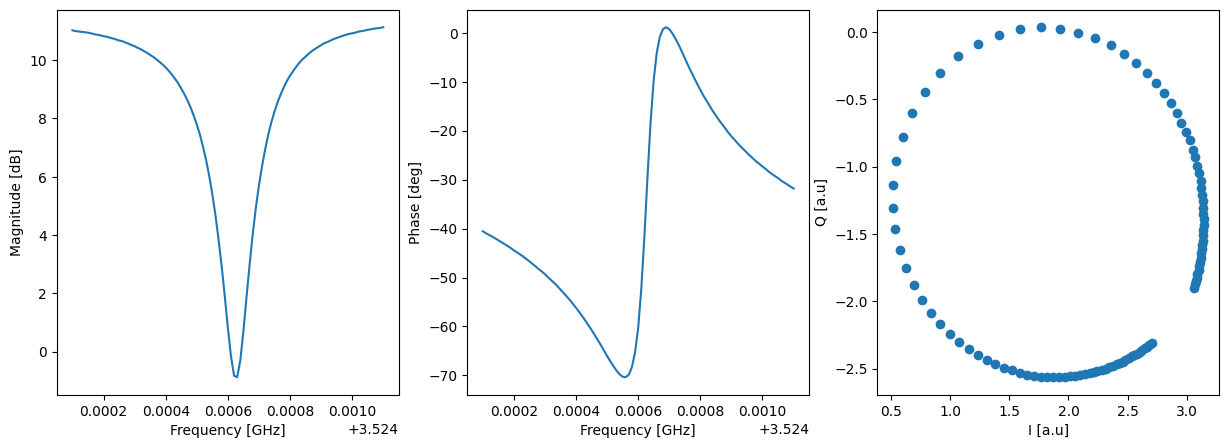

In [6]:
plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 3, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

I = magnitude_lin*np.cos(phase*np.pi/180)
Q = magnitude_lin*np.sin(phase*np.pi/180)
plt.subplot(1, 3, 3) # row 1, col 2 index 2
plt.plot(I, Q,'o')
ax = plt.gca()
ax.set_xlabel('I [a.u]')
ax.set_ylabel('Q [a.u]')

In [7]:
def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

In [9]:
import scipy.optimize as optimize
center_estimate = 2, -1
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

NameError: name 'sqrt' is not defined

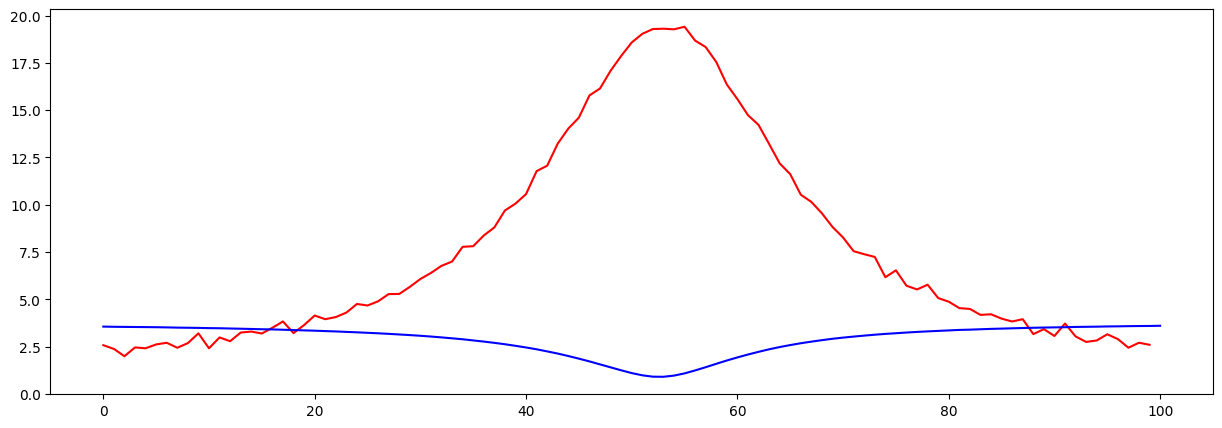

In [32]:
plt.plot(np.sqrt(np.diff(I)**2+np.diff(Q)**2)*100,'r')
plt.plot(magnitude_lin,'b')

In [201]:
dataset=load_by_run_spec(captured_run_id=24)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 4.227e+09 ......
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 4.423 ... 4.326
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B 12.91 ... 12.72
    pna_tr1_phase             (pna_frequency_axis) float64 808B 18.29 ... 15.85
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 18.29 ... 15.85
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192048476d5
    run_timestamp:                          2024-09-18 11:44:03
    ...                                     ...
    run_timestamp_raw:                      1726652643.0702064
    completed_timestamp_raw:                1726652646.4152439
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [202]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

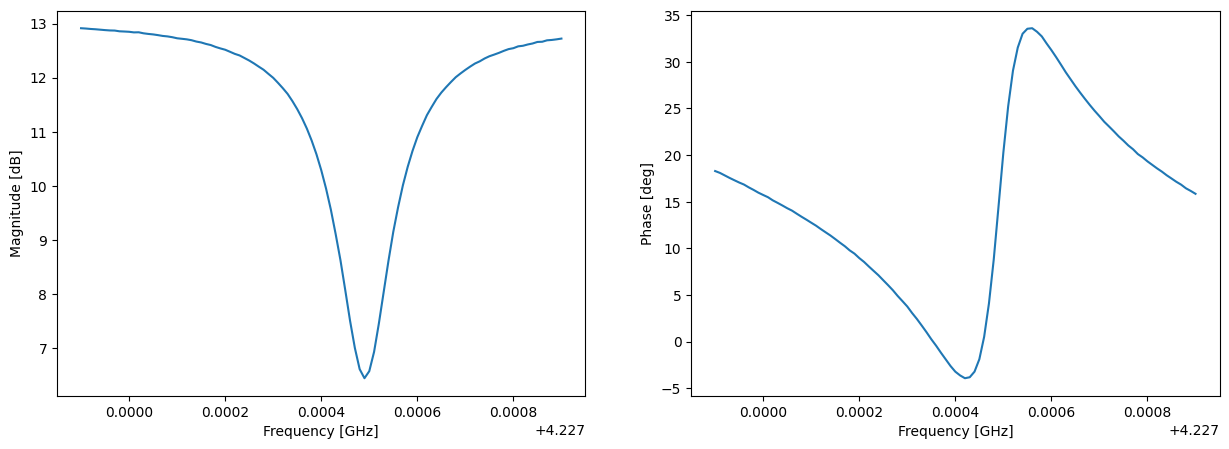

In [203]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [204]:
dataset=load_by_run_spec(captured_run_id=20)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 4.93e+09 ... ...
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 4.701 ... 4.57
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B 13.44 ... 13.2
    pna_tr1_phase             (pna_frequency_axis) float64 808B 106.6 ... 100.7
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 106.6 ... 100.7
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192046c2633
    run_timestamp:                          2024-09-18 11:17:29
    ...                                     ...
    run_timestamp_raw:                      1726651049.5839388
    completed_timestamp_raw:                1726651053.17177
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [205]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

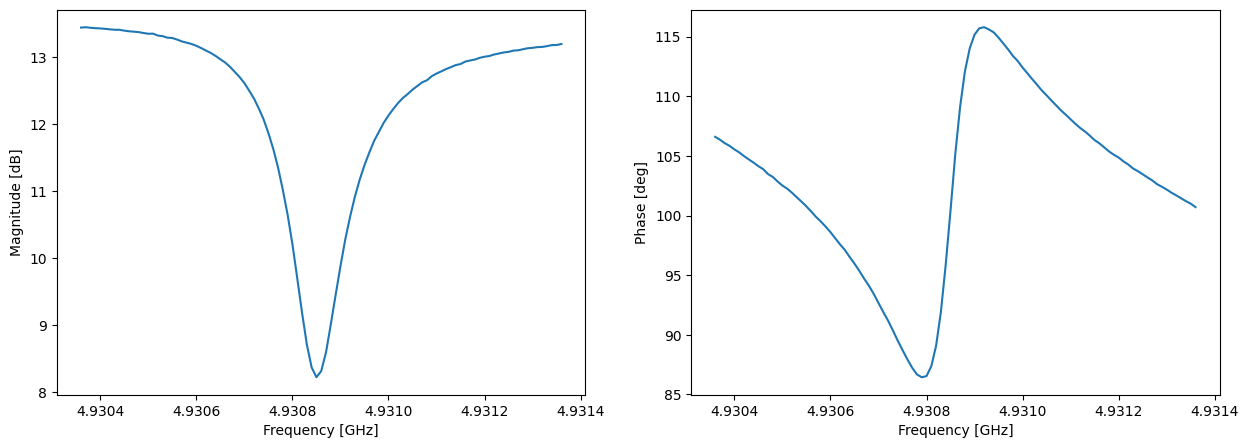

In [206]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [207]:
dataset=load_by_run_spec(captured_run_id=25)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 5.64e+09 ... ...
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 2.072 ... 2.084
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B 6.326 ... 6.379
    pna_tr1_phase             (pna_frequency_axis) float64 808B 132.8 ... 127.9
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 132.8 ... 127.9
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192048e3c40
    run_timestamp:                          2024-09-18 11:54:43
    ...                                     ...
    run_timestamp_raw:                      1726653283.4385
    completed_timestamp_raw:                1726653286.870858
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [208]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

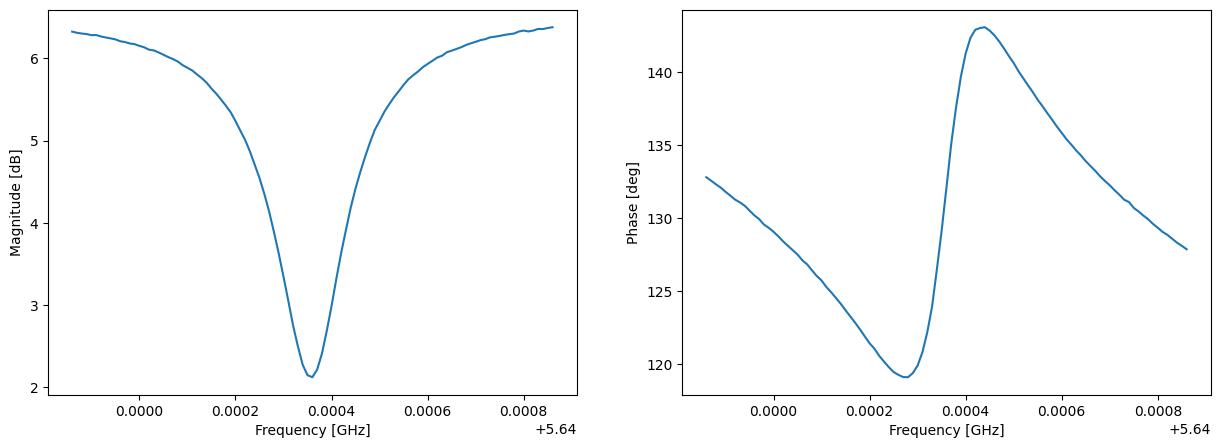

In [209]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [210]:
dataset=load_by_run_spec(captured_run_id=26)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 6.345e+09 ......
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 2.072 ... 2.246
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B 6.327 ... 7.03
    pna_tr1_phase             (pna_frequency_axis) float64 808B 173.9 ... 175.0
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 173.9 ... 175.0
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192049318f2
    run_timestamp:                          2024-09-18 12:00:02
    ...                                     ...
    run_timestamp_raw:                      1726653602.0816932
    completed_timestamp_raw:                1726653605.7428484
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [211]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

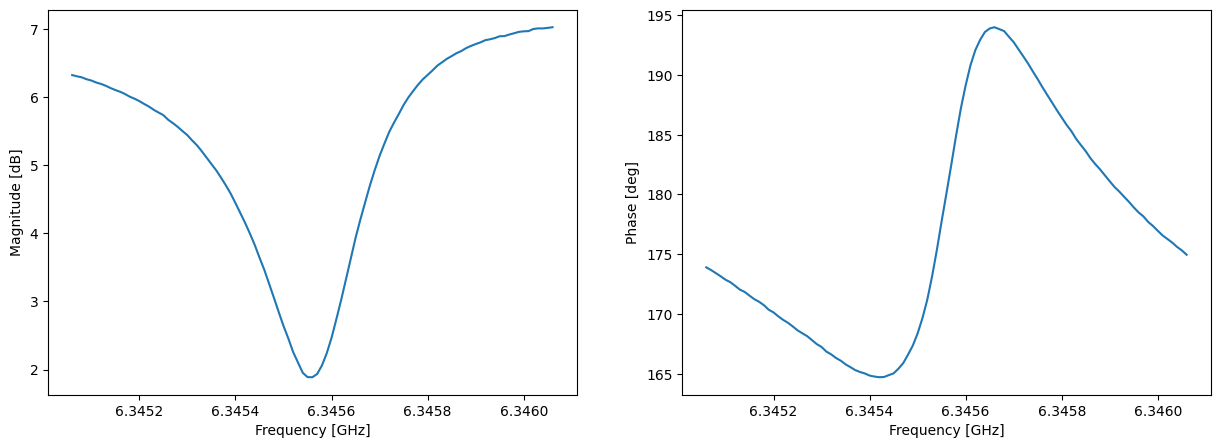

In [212]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase1)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [213]:
dataset=load_by_run_spec(captured_run_id=29)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 7.045e+09 ......
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 1.526 ... 1.453
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B 3.672 ... 3.244
    pna_tr1_phase             (pna_frequency_axis) float64 808B -14.47 ... -7...
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B -14.47 ... -7...
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192049831e2
    run_timestamp:                          2024-09-18 12:05:36
    ...                                     ...
    run_timestamp_raw:                      1726653936.1434343
    completed_timestamp_raw:                1726653939.9103372
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [214]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

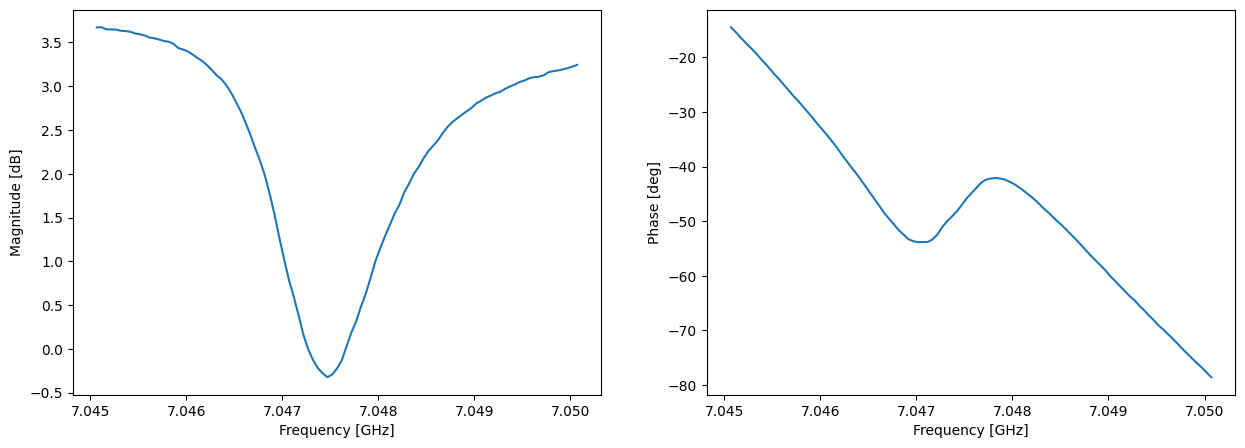

In [215]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [216]:
dataset=load_by_run_spec(captured_run_id=30)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 7.676e+09 ......
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 0.7664 ... 0....
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B -2.31 ... -1.573
    pna_tr1_phase             (pna_frequency_axis) float64 808B 4.149 ... 7.949
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 4.149 ... -352.1
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192049cc0ae
    run_timestamp:                          2024-09-18 12:10:34
    ...                                     ...
    run_timestamp_raw:                      1726654234.8770921
    completed_timestamp_raw:                1726654238.2402132
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [217]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

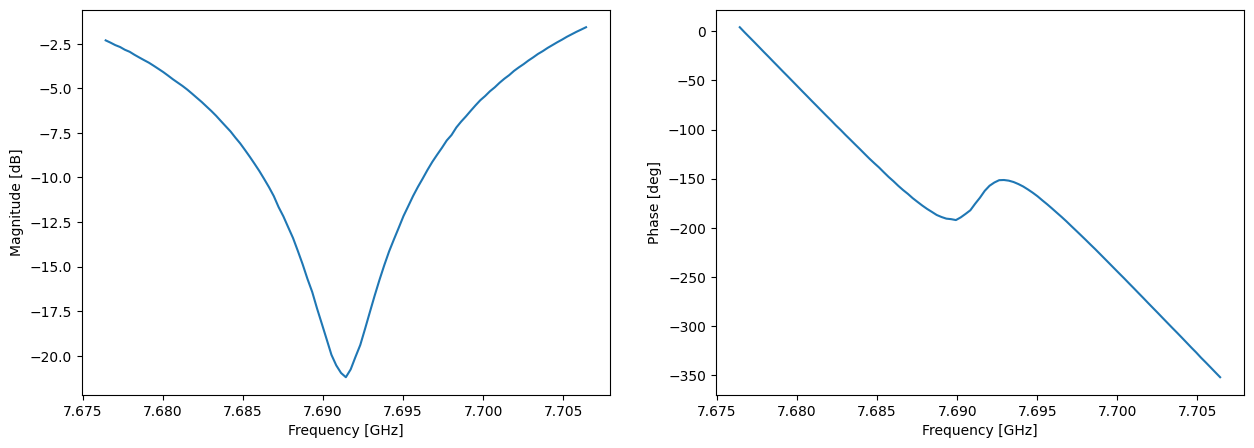

In [218]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase1)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [219]:
dataset=load_by_run_spec(captured_run_id=32)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 16kB
Dimensions:                   (pna_frequency_axis: 401)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 3kB 8.473e+09 ... ...
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 3kB 0.1718 ... 0.1144
    pna_tr1_magnitude         (pna_frequency_axis) float64 3kB -15.3 ... -18.83
    pna_tr1_phase             (pna_frequency_axis) float64 3kB 75.79 ... 20.65
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 3kB 75.79 ... -339.3
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-019204a09ec2
    run_timestamp:                          2024-09-18 12:14:48
    ...                                     ...
    run_timestamp_raw:                      1726654488.2974486
    completed_timestamp_raw:                1726654497.4875176
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [220]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

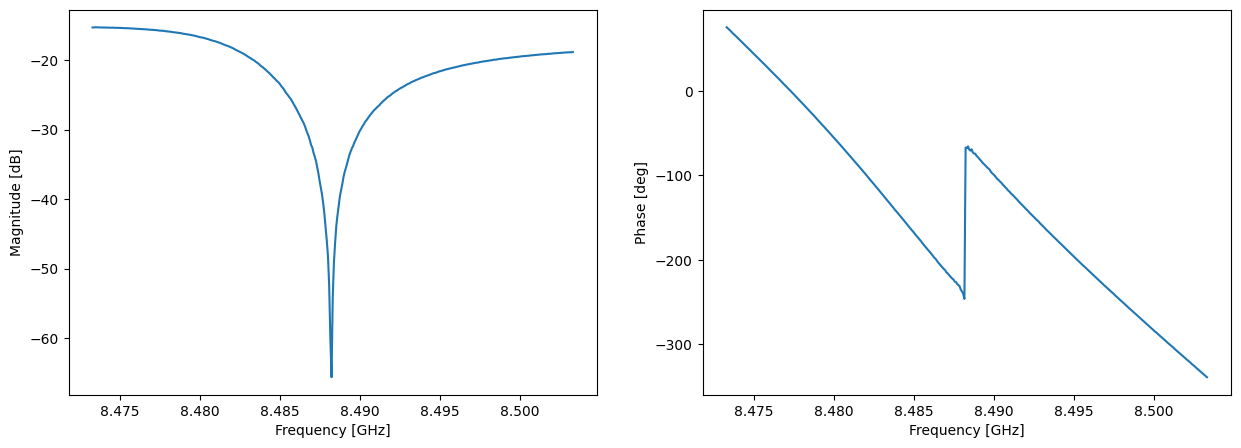

In [221]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase1)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [222]:
dataset=load_by_run_spec(captured_run_id=33)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 4kB
Dimensions:                   (pna_frequency_axis: 101)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 808B 9.167e+09 ......
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 808B 0.02023 ... 0...
    pna_tr1_magnitude         (pna_frequency_axis) float64 808B -33.88 ... -3...
    pna_tr1_phase             (pna_frequency_axis) float64 808B 13.63 ... -115.0
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 808B 13.63 ... -475.0
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-019204a365d2
    run_timestamp:                          2024-09-18 12:17:50
    ...                                     ...
    run_timestamp_raw:                      1726654670.3528562
    completed_timestamp_raw:                1726654673.98748
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [223]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

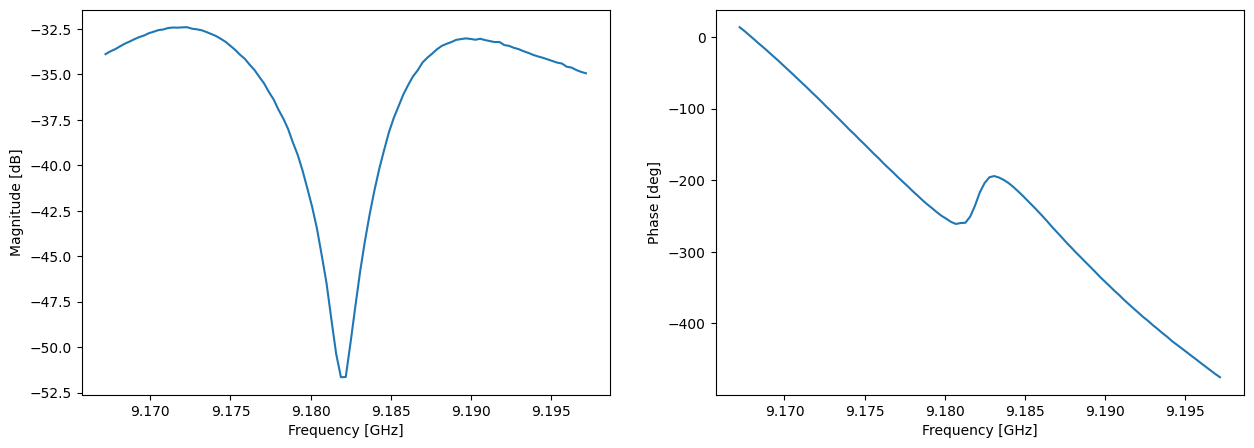

In [224]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase1)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

In [225]:
dataset=load_by_run_spec(captured_run_id=34)
ds=dataset.to_xarray_dataset()
ds

<xarray.Dataset> Size: 8kB
Dimensions:                   (pna_frequency_axis: 201)
Coordinates:
  * pna_frequency_axis        (pna_frequency_axis) float64 2kB 9.826e+09 ... ...
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 2kB 0.001023 ... 0...
    pna_tr1_magnitude         (pna_frequency_axis) float64 2kB -59.8 ... -64.72
    pna_tr1_phase             (pna_frequency_axis) float64 2kB -92.4 ... 149.9
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 2kB -92.4 ... -1.6...
Attributes: (12/18)
    ds_name:                                results
    sample_name:                            C12_025_0
    exp_name:                               S21 transmission, power=-40dBm, i...
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-019204a65c8d
    run_timestamp:                          2024-09-18 12:21:04
    ...                                     ...
    run_timestamp_raw:                      1726654864.5751233
    completed_timestamp_raw:                1726654870.1575415
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...

In [226]:
frequency=t = ds.coords['pna_frequency_axis'].data
magnitude= ds.data_vars['pna_tr1_magnitude'].data
phase=ds.data_vars['pna_tr1_phase'].data
phase1=ds.data_vars['pna_tr1_unwrapped_phase'].data

Text(0, 0.5, 'Phase [deg]')

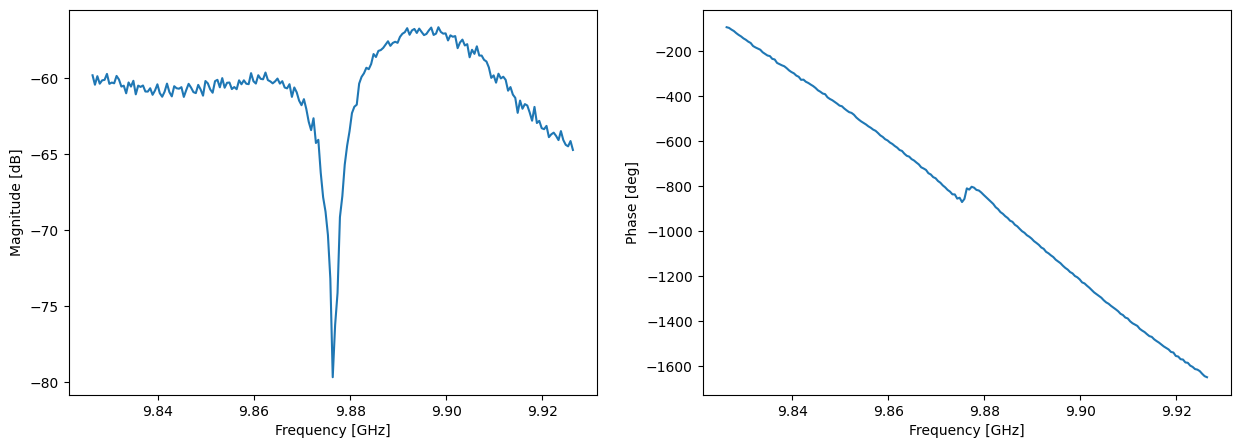

In [227]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(frequency/(1000000000), magnitude)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Magnitude [dB]')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(frequency/(1000000000), phase1)
ax = plt.gca()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase [deg]')

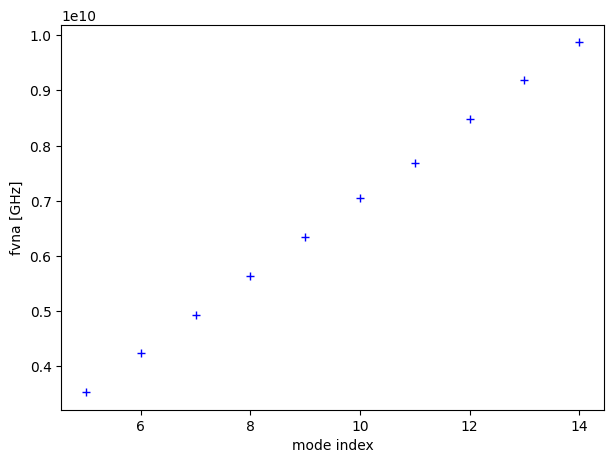

In [232]:
mode_index=range(5,15)#the resonance frequency is roughly 703MHz
resonance_frequency=[3.52462e9, 4.2275e9, 4.93084e9, 5.64036e9, 6.34555e9, 7.0475e9, 7.692e9, 8.488e9, 9.182e9, 9.875e9] #these are the resonances readout from the measurements
plt.plot(mode_index, resonance_frequency, 'b+')
ax = plt.gca()
ax.set_xlabel('mode index')
ax.set_ylabel('fvna [GHz]')
plt.rcParams["figure.figsize"] = (7, 5) #setting figure size


Text(0, 0.5, 'angular frequency [rad/s]')

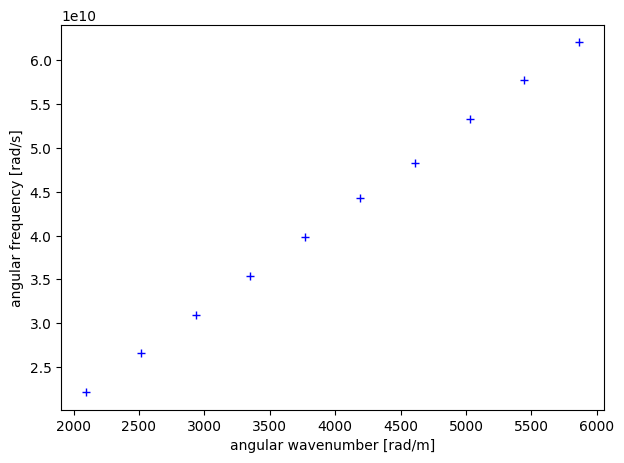

In [229]:
angular_frequency_index=[value *(np.pi)*2 for value in resonance_frequency]
angular_wavenumber_index=[value *(np.pi)/0.0075 for value in mode_index]#resonator_length=7.5mm
plt.plot(angular_wavenumber_index, angular_frequency_index, 'b+')
ax = plt.gca()
ax.set_xlabel('angular wavenumber [rad/m]')
ax.set_ylabel('angular frequency [rad/s]')
plt.rcParams["figure.figsize"] = (7, 5) #setting figure size

Text(0, 0.5, 'photon velocity [m/s]')

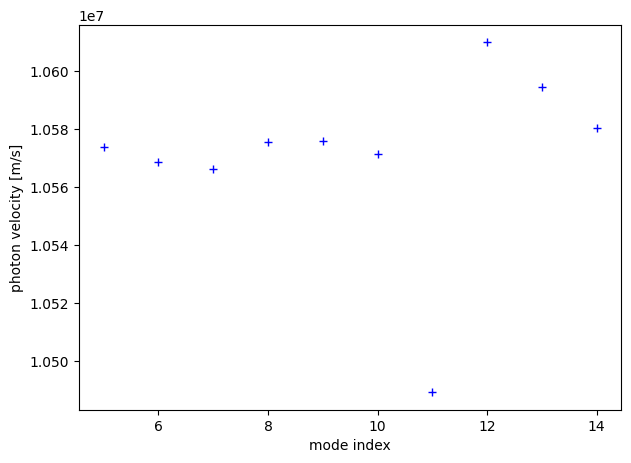

In [230]:
photon_velocity=[]
for i in range(len(angular_frequency_index)):
    photon_velocity.append(angular_frequency_index[i]/angular_wavenumber_index[i])
plt.plot(mode_index, photon_velocity, 'b+')
ax = plt.gca()
ax.set_xlabel('mode index')
ax.set_ylabel('photon velocity [m/s]')
plt.rcParams["figure.figsize"] = (7, 5) #setting figure size

In [231]:
Vph = 1.057*1e7 # m / s
Cl = 1.0841055761665724*1e-10 # F/m, got it from Sandrine
Lm = 5.678040791451472*1e-7 # H/m, got it from Sandrine

Lkin = (1/(Vph*Vph*Cl))-Lm # in unit of H/m
print('Lkin = {:.1f} pH/square'.format(Lkin*1e12*3e-6))#cavity width is 3um, changing the unit from H to pH.  

Lkin = 246.0 pH/square


In [196]:
import math
Zc = math.sqrt((Lm+Lkin)/Cl)
print('Zc = {:.1f} ohm'.format(Zc))

Zc = 872.7 ohm
